<p align="center">
  <h1 align="center">Units conversion tutorial</h1>
</p>

<div align="center" style="max-width:200px;display:block;margin:auto;">

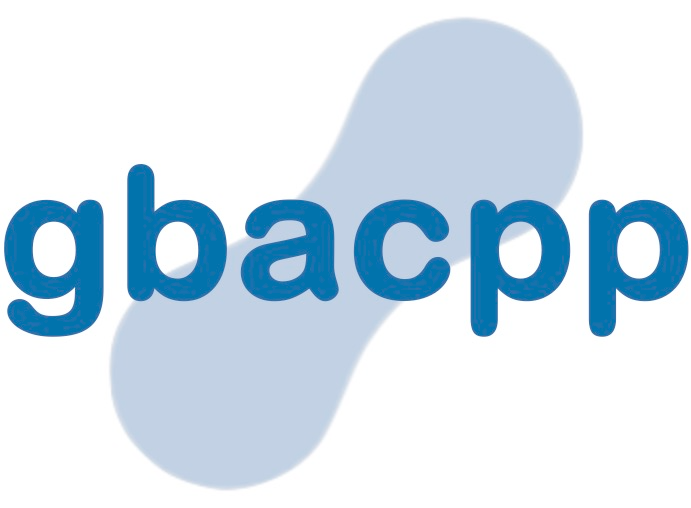

</div>

-----------------

When building a self-replicating cell (SRC) model relying on growth balance analysis (GBA) formalism, it is necessary to convert stoichiometric coefficients and kinetic parameters to mass units, or mass normalized units (<a href="https://doi.org/10.1371/journal.pcbi.1011156" target="_blank">Dourado et al., 2023</a>). See also the tutorial available on <a href="https://cellgrowthsim.com/">https://cellgrowthsim.com/</a>.

Three types of variables must be converted. This requires to know the molecular mass (in Da) of metabolites and enzymes.

### Conversion of stoichiometric coefficients <a name="stoichiometric_coefficients"></a>

The stoichiometry of each reaction is converted. For each metabolite $i$ and reaction $j$:
- Each stoichiometric coefficient is multiplied by the mass of the metabolite $m_i$ (in Da),
  $$S_{i,j} = S_{i,\cdot} \times m_i,$$
- The calculated mass stoichiometry is then normalized (the sum of reactant coefficients is equal to -1, the sum of product coefficients is equal to 1),
  $$
  M_{i,j} =
  \left\{
  \begin{array}{rl}
  \dfrac{S_{i,j}}{\sum_{i \in \text{reactants}} \lvert S_{i,j} \rvert} & \text{ if $i$ reactant},\\\\
  \dfrac{S_{i,j}}{\sum_{i \in \text{products}} S_{i,j}} & \text{ if $i$ product}.
  \end{array}
  \right.
  $$

### Conversion of Michaelis constant values <a name="km"></a>

$K_\text{M}$ values are converted to mass units:
- Each $K_\text{M}$ value is multiplied by the mass of the metabolite
  $$K_\text{M,i} = K_\text{M,i} \times m_i \text{ for each metabolite }i.$$

### Conversion of turnover rates <a name="kcat"></a>

$k_\text{cat}$ values are converted to mass units:
- Each $k_\text{cat}$ value is multipled by the sum of the product masses times their stoichiometric coefficient, and divided by the mass of the enzyme $e$. Therefore for the forward $k_\text{cat,j}^f$ of reaction $j$:
  $$k_\text{cat,j}^f = k_\text{cat,j}^f \times \dfrac{\sum_{i \in \text{products}} S_{ij} \times m_i}{e_j},$$
- And for the backward $k_\text{cat,j}^b$:
  $$k_\text{cat,j}^b = k_\text{cat,j}^b \times \dfrac{\sum_{i \in \text{reactants}} S_{ij} \times m_i}{e_j}.$$